In [2]:
import torch
import pandas as pd

# Optional for data visualization (later stages)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('/content/Fraud_dataset.csv')
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15121 entries, 0 to 15120
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            15121 non-null  int64  
 1   type            15121 non-null  object 
 2   amount          15121 non-null  float64
 3   nameOrig        15121 non-null  object 
 4   oldbalanceOrg   15121 non-null  float64
 5   newbalanceOrig  15121 non-null  float64
 6   nameDest        15121 non-null  object 
 7   oldbalanceDest  15120 non-null  float64
 8   newbalanceDest  15120 non-null  float64
 9   isFraud         15120 non-null  float64
 10  isFlaggedFraud  15120 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.3+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,15121.000000,1.512100e+04,1.512100e+04,1.512100e+04,1.512000e+04,1.512000e+04,15120.000000,15120.0
mean,5.208386,1.141586e+05,7.519870e+05,7.676741e+05,8.278360e+05,1.153106e+06,0.005225,0.0
std,2.488843,2.827088e+05,1.965268e+06,2.007505e+06,2.512250e+06,3.158826e+06,0.072097,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,3.000000,4.687140e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,7.000000,1.312560e+04,2.012500e+04,7.241380e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,1.246170e+05,1.253520e+05,1.187286e+05,2.547435e+05,2.835928e+05,0.000000,0.0
max,8.000000,1.000000e+07,1.290000e+07,1.300000e+07,2.090000e+07,2.530000e+07,1.000000,0.0


In [6]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

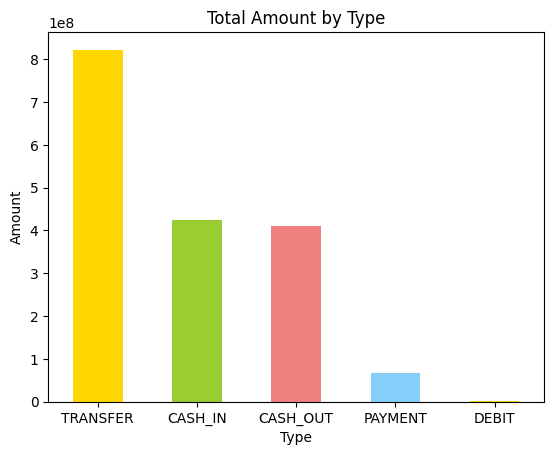

In [7]:
# prompt: a script to plot a stacked bar chat showing which 'type' had the highest amount

df_type = df.groupby('type')['amount'].sum().sort_values(ascending=False)

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

df_type.plot(kind='bar', stacked=True, rot=0, color=colors_list)

plt.title('Total Amount by Type')
plt.xlabel('Type')
plt.ylabel('Amount')
plt.show()


Transaction Type Distribution:
type
PAYMENT     8341
CASH_IN     2527
CASH_OUT    2311
TRANSFER    1524
DEBIT        418
Name: count, dtype: int64


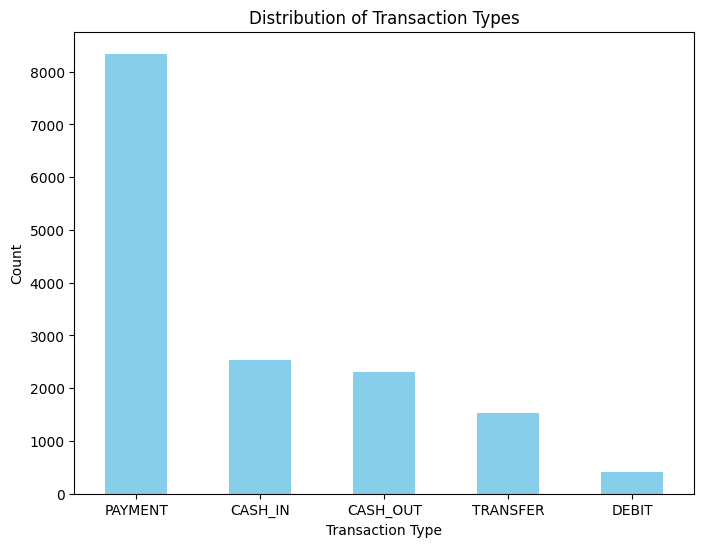


Percentage of Fraudulent Transactions by Type:
type
CASH_IN     0.000000
CASH_OUT    1.774124
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    2.493438
Name: isFraud, dtype: float64


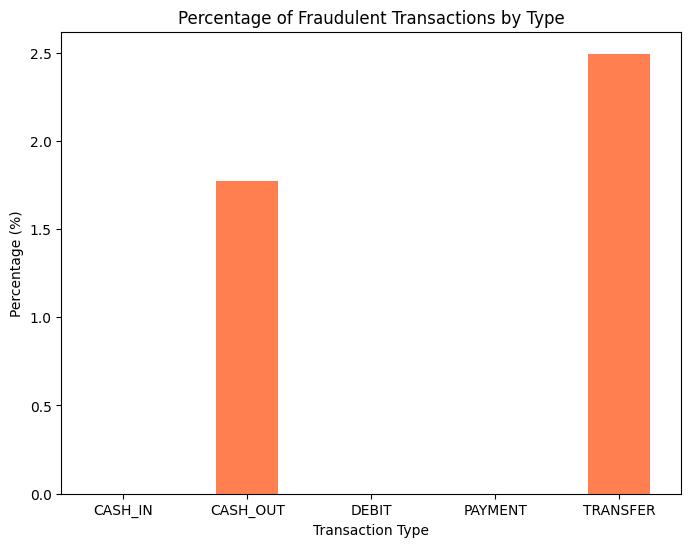

In [8]:
# Analyze transaction type distribution
print("Transaction Type Distribution:")
type_counts = df['type'].value_counts()
print(type_counts)

# Plot the distribution as a bar chart
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Analyze fraud by transaction type
fraud_by_type = df.groupby('type')['isFraud'].mean() * 100  # Calculate percentage

print("\nPercentage of Fraudulent Transactions by Type:")
print(fraud_by_type)

# Plot fraud percentage by transaction type
plt.figure(figsize=(8, 6))
fraud_by_type.plot(kind='bar', color='coral')
plt.title("Percentage of Fraudulent Transactions by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()



Transaction Amount Distribution:
count    1.512100e+04
mean     1.141586e+05
std      2.827088e+05
min      2.390000e+00
25%      4.687140e+03
50%      1.312560e+04
75%      1.246170e+05
max      1.000000e+07
Name: amount, dtype: float64


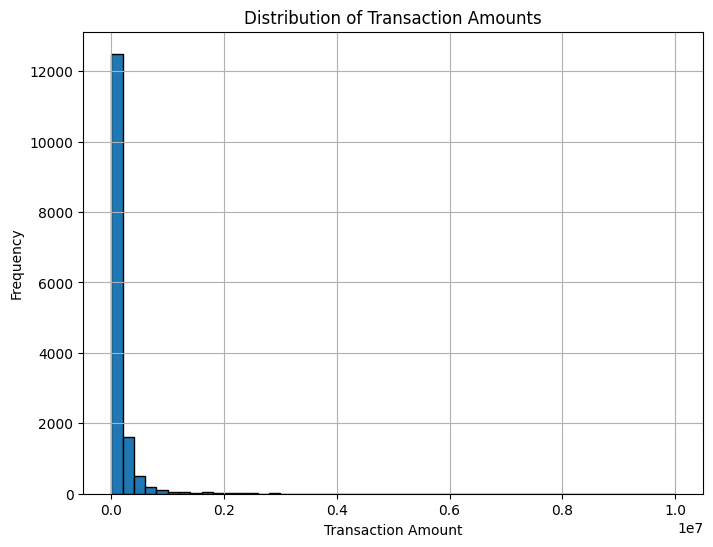

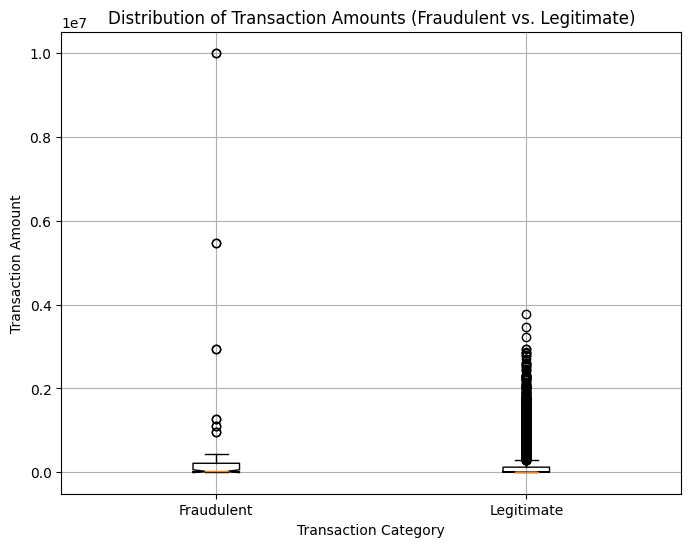

In [9]:
# Analyze transaction amount distribution
print("\nTransaction Amount Distribution:")
print(df['amount'].describe())  # Get summary statistics

plt.figure(figsize=(8, 6))
plt.hist(df['amount'], bins=50, edgecolor='black')  # Create histogram with 50 bins
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(True)  # Add grid lines for better readability
plt.show()

# Analyze fraudulent vs. legitimate transaction amounts
fraudulent_amounts = df[df['isFraud'] == 1]['amount']
legitimate_amounts = df[df['isFraud'] == 0]['amount']

plt.figure(figsize=(8, 6))
plt.boxplot([fraudulent_amounts, legitimate_amounts], labels=['Fraudulent', 'Legitimate'], notch=True)
plt.title("Distribution of Transaction Amounts (Fraudulent vs. Legitimate)")
plt.xlabel("Transaction Category")
plt.ylabel("Transaction Amount")
plt.grid(True)
plt.show()


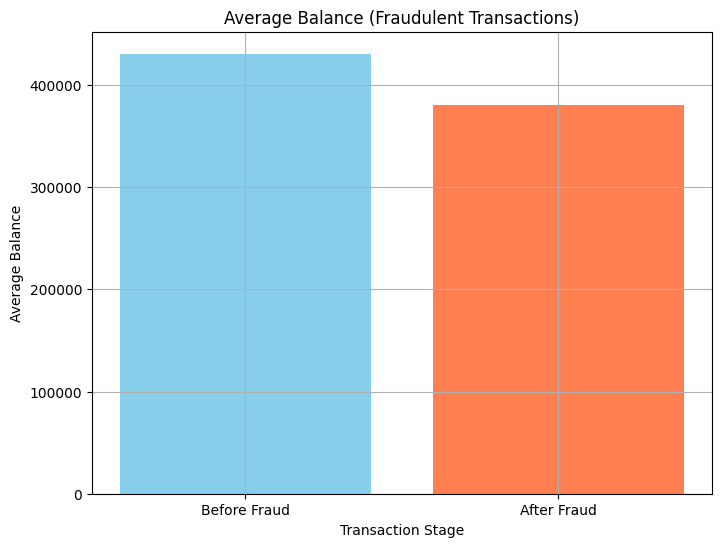

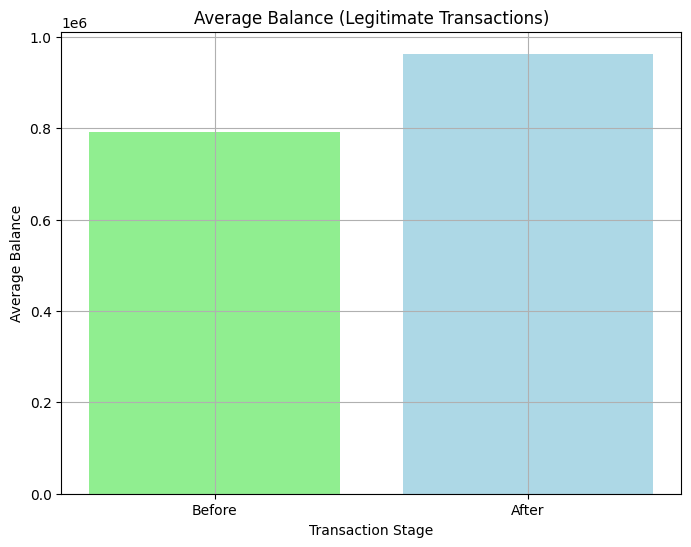

In [10]:
# Analyze balance distributions (old/new for origin and destination)
balance_features = ['oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']


# Analyze impact of balance on fraud (average balance before and after)
fraudulent = df[df['isFraud'] == 1]
legitimate = df[df['isFraud'] == 0]

avg_balance_before_fraud = fraudulent[['oldbalanceOrg', 'oldbalanceDest']].mean(axis=1)
avg_balance_after_fraud = fraudulent[['newbalanceOrig', 'newbalanceDest']].mean(axis=1)
avg_balance_before_legitimate = legitimate[['oldbalanceOrg', 'oldbalanceDest']].mean(axis=1)
avg_balance_after_legitimate = legitimate[['newbalanceOrig', 'newbalanceDest']].mean(axis=1)

# Plot average balance comparison (before and after) for fraud
fraud_balance_labels = ['Before Fraud', 'After Fraud']
plt.figure(figsize=(8, 6))
plt.bar(fraud_balance_labels, [avg_balance_before_fraud.mean(), avg_balance_after_fraud.mean()], color=['skyblue', 'coral'])
plt.title("Average Balance (Fraudulent Transactions)")
plt.xlabel("Transaction Stage")
plt.ylabel("Average Balance")
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()

# Plot average balance comparison (before and after) for legitimate
legitimate_balance_labels = ['Before', 'After']
plt.figure(figsize=(8, 6))
plt.bar(legitimate_balance_labels, [avg_balance_before_legitimate.mean(), avg_balance_after_legitimate.mean()], color=['lightgreen', 'lightblue'])
plt.title("Average Balance (Legitimate Transactions)")
plt.xlabel("Transaction Stage")
plt.ylabel("Average Balance")
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()


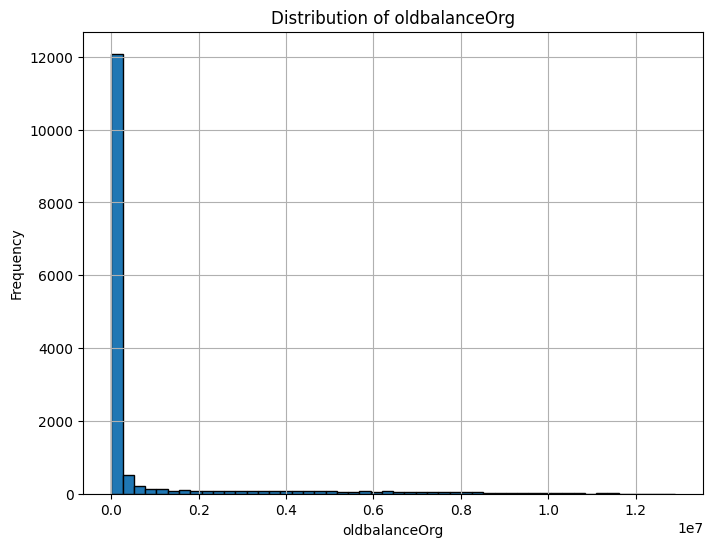

The column 'newbalanceOrg' does not exist in the DataFrame.


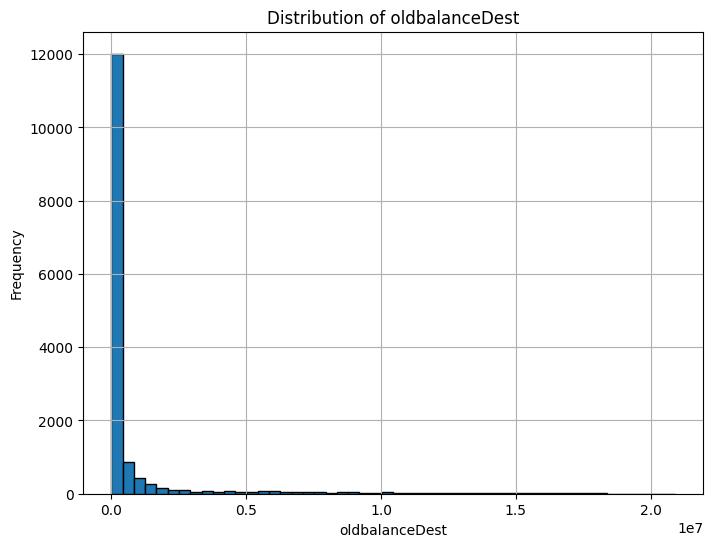

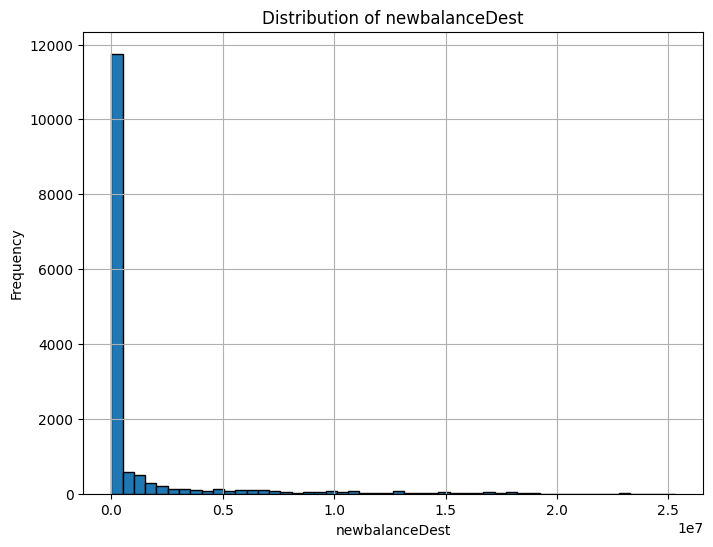

In [11]:
for feature in balance_features:
  if feature in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=50, edgecolor='black')  # Create histogram with 50 bins
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
  else:
    print(f"The column '{feature}' does not exist in the DataFrame.")

In [32]:
# Check for missing values in relevant columns
print(df['isFraud'].isnull().sum())
print(df['isFlaggedFraud'].isnull().sum())

# Check if "isFlaggedFraud" exists
if 'isFlaggedFraud' in df.columns:
  # Calculate confusion matrix
  from sklearn.metrics import confusion_matrix

  # Count actual fraud cases (positive class)
  actual_fraud = df[df['isFraud'] == 1].shape[0]

  # Create confusion matrix
  confusion_matrix_result = confusion_matrix(df['isFraud'], df['isFlaggedFraud'])

  # Calculate precision, recall (assuming "isFraud" is the positive class)
  true_positives = confusion_matrix_result[1, 1]
  false_positives = confusion_matrix_result[0, 1]
  false_negatives = confusion_matrix_result[1, 0]

  # Precision - How many flagged frauds were actually fraudulent?
  precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

  # Recall - How many actual frauds were flagged?
  recall = true_positives / actual_fraud if actual_fraud > 0 else 0

  print("\nAnalysis of 'isFlaggedFraud' Feature:")
  print(confusion_matrix_result)

  print(f"\nPrecision (Flagged Fraud that is Actual Fraud): {precision:.4f}")
  print(f"Recall (Actual Fraud that is Flagged): {recall:.4f}")
else:
  print("\n'isFlaggedFraud' feature not found in the dataset.")


1
1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


ValueError: Input y_true contains NaN.

In [12]:
df.dropna(subset=['isFlaggedFraud'], inplace=True)

In [13]:
df = df.dropna(subset=['isFlaggedFraud'])

In [14]:
df['isFlaggedFraud'].fillna(0, inplace=True)  # Replace missing values with 0

In [15]:
def handle_missing_values(df, method='drop'):
  """
  This function handles missing values in a DataFrame.

  Args:
      data (pandas.DataFrame): The DataFrame containing the data.
      method (str, optional): The method for handling missing values.
                              Options are 'drop' (default) or 'impute'.

  Returns:
      pandas.DataFrame: The DataFrame with missing values handled.
  """
  if method == 'drop':
    # Drop rows with missing values
    return df.dropna()
  elif method == 'impute':
    # Impute missing values (using median for this example)
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    df = pd.DataFrame(imputer.fit_transform(df))
    df.columns = list(df)  # Set column names after imputation
    return df
  else:
    raise ValueError("Invalid method. Choose 'drop' or 'impute'.")

# Example usage (replace 'column1', 'column2' with your actual columns)
missing_value_cols = ['column1', 'column2']  # Columns to handle
data_preprocessed = handle_missing_values(df.copy(), method='drop')  # Copy data to avoid modifying original

# Alternatively, for imputation:
# data_preprocessed = handle_missing_values(data.copy(), method='impute')

# Print results (optional)
print(f"Original data shape: {df.shape}")
print(f"Preprocessed data shape (after handling missing values): {data_preprocessed.shape}")


Original data shape: (15120, 11)
Preprocessed data shape (after handling missing values): (15120, 11)


In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['type', 'nameOrig', 'nameDest']

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Display the first few rows of the dataframe to check the encoding
print(df.head())

   step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     3   9839.64      1741       170136.0       160296.36      5970   
1     1     3   1864.28      5240        21249.0        19384.72      6263   
2     1     4    181.00      2350          181.0            0.00      1369   
3     1     1    181.00     13863          181.0            0.00      1211   
4     1     3  11668.14      8252        41554.0        29885.86      2723   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0             0.0             0.0      0.0             0.0  
1             0.0             0.0      0.0             0.0  
2             0.0             0.0      1.0             0.0  
3         21182.0             0.0      1.0             0.0  
4             0.0             0.0      0.0             0.0  


In [16]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [30]:
import torch
import torch.nn as nn

# Define the Generator network
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.Sigmoid()  # Changed to Sigmoid for output between 0 and 1
        )

    def forward(self, x):
        return self.model(x)

# Define the Discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output a probability
        )

    def forward(self, x):
        return self.model(x)

# Example usage
if __name__ == "__main__":
    # Define input dimensions
    input_dim = 100  # Dimension of the noise vector for the generator
    output_dim = 9  # Dimension of the generated transaction (excluding 'isFraud' and 'isFlaggedFraud')

    # Create instances of the Generator and Discriminator
    generator = Generator(input_dim, output_dim)
    discriminator = Discriminator(output_dim)

    # Print the architectures
    print("Generator Architecture:\n", generator)
    print("\nDiscriminator Architecture:\n", discriminator)

    # Example input


Generator Architecture:
 Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=9, bias=True)
    (7): Sigmoid()
  )
)

Discriminator Architecture:
 Discriminator(
  (model): Sequential(
    (0): Linear(in_features=9, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=128, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the Generator network
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.Sigmoid()  # Output between 0 and 1
        )

    def forward(self, x):
        return self.model(x)

# Define the Discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output a probability
        )

    def forward(self, x):
        return self.model(x)

# Function to initialize the weights of the networks
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# Hyperparameters
batch_size = 64
lr = 0.0002
num_epochs = 100
input_dim = 100  # Dimension of the noise vector for the generator
output_dim = df.shape[1]  # Dimension of the generated transaction (excluding 'isFraud' and 'isFlaggedFraud')

# Load and preprocess the dataset
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.values)
dataset = TensorDataset(torch.tensor(df_scaled, dtype=torch.float32))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create instances of the Generator and Discriminator
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(output_dim)

# Initialize weights
generator.apply(weights_init)
discriminator.apply(weights_init)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Training the GAN
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader):
        # Train Discriminator
        real_data = data[0]
        batch_size = real_data.size(0)
        labels_real = torch.ones(batch_size, 1)
        labels_fake = torch.zeros(batch_size, 1)

        # Real data
        outputs = discriminator(real_data)
        d_loss_real = criterion(outputs, labels_real)

        # Fake data
        noise = torch.randn(batch_size, input_dim)
        fake_data = generator(noise)
        outputs = discriminator(fake_data.detach())
        d_loss_fake = criterion(outputs, labels_fake)

        # Backpropagation and optimization
        d_loss = d_loss_real + d_loss_fake
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        outputs = discriminator(fake_data)
        g_loss = criterion(outputs, labels_real)  # We want the generator to fool the discriminator

        # Backpropagation and optimization
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        # Logging
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}')

# Save the trained models
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')


Streaming output truncated to the last 5000 lines.
Epoch [32/100], Step [3800/7382], D Loss: 1.3874, G Loss: 0.7438
Epoch [32/100], Step [3900/7382], D Loss: 1.3877, G Loss: 0.6822
Epoch [32/100], Step [4000/7382], D Loss: 1.3821, G Loss: 0.6971
Epoch [32/100], Step [4100/7382], D Loss: 1.3556, G Loss: 0.7201
Epoch [32/100], Step [4200/7382], D Loss: 1.3887, G Loss: 0.6982
Epoch [32/100], Step [4300/7382], D Loss: 1.3613, G Loss: 0.7025
Epoch [32/100], Step [4400/7382], D Loss: 1.3745, G Loss: 0.7370
Epoch [32/100], Step [4500/7382], D Loss: 1.3450, G Loss: 0.7500
Epoch [32/100], Step [4600/7382], D Loss: 1.3434, G Loss: 0.7573
Epoch [32/100], Step [4700/7382], D Loss: 1.3690, G Loss: 0.7346
Epoch [32/100], Step [4800/7382], D Loss: 1.3515, G Loss: 0.7462
Epoch [32/100], Step [4900/7382], D Loss: 1.3957, G Loss: 0.7240
Epoch [32/100], Step [5000/7382], D Loss: 1.3720, G Loss: 0.7701
Epoch [32/100], Step [5100/7382], D Loss: 1.3876, G Loss: 0.7205
Epoch [32/100], Step [5200/7382], D Los

Statistical Comparison between Real and Synthetic Data
step: Real Mean = 13.593298123432225, Synthetic Mean = 13.803220748901367
step: Real Std = 3.598465952326758, Synthetic Std = 3.6236093044281006
type: Real Mean = 1.6918703231337517, Synthetic Mean = 1.2849169969558716
type: Real Std = 1.3414047498892219, Synthetic Std = 1.4096323251724243
amount: Real Mean = 168175.88590332455, Synthetic Mean = 165868.703125
amount: Real Std = 275230.54112470045, Synthetic Std = 193222.84375
nameOrig: Real Mean = 236179.60862395613, Synthetic Mean = 230909.453125
nameOrig: Real Std = 136359.6004262548, Synthetic Std = 133434.65625
oldbalanceOrg: Real Mean = 910510.3208010283, Synthetic Mean = 1629250.125
oldbalanceOrg: Real Std = 2988086.1268851627, Synthetic Std = 4037280.5
newbalanceOrig: Real Mean = 930357.5502715677, Synthetic Mean = 1725265.625
newbalanceOrig: Real Std = 3025461.2617613417, Synthetic Std = 4100689.5
nameDest: Real Mean = 57752.267531037985, Synthetic Mean = 48216.75390625
nam

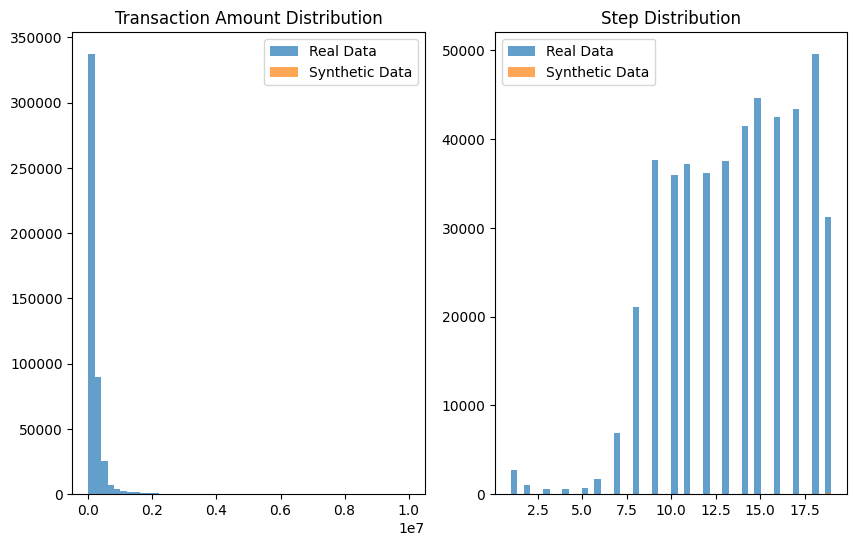

In [34]:
import torch
import pandas as pd
import numpy as np

# Define the Generator network (as you have already trained it)
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.Sigmoid()  # Output between 0 and 1
        )

    def forward(self, x):
        return self.model(x)

# Load the trained generator model
input_dim = 100  # Dimension of the noise vector for the generator
output_dim = df.shape[1]  # Dimension of the generated transaction (excluding 'isFraud' and 'isFlaggedFraud')
generator = Generator(input_dim, output_dim)
generator.load_state_dict(torch.load('generator.pth'))
generator.eval()

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
generator = generator.to(device)

# Function to generate synthetic samples
def generate_synthetic_samples(generator, num_samples, latent_dim, device):
    generator.eval()
    z = torch.randn(num_samples, latent_dim).to(device)
    with torch.no_grad():
        synthetic_samples = generator(z)
    return synthetic_samples.cpu().numpy()

# Generate synthetic samples
num_samples = 1000
synthetic_samples = generate_synthetic_samples(generator, num_samples, input_dim, device)

# Convert to DataFrame for easy manipulation
columns = df.columns  # Use the same columns as the original dataset
synthetic_df = pd.DataFrame(synthetic_samples, columns=columns)

# Inverse transform to original scale if you used MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.values)
synthetic_df = pd.DataFrame(scaler.inverse_transform(synthetic_df.values), columns=columns)

# Statistical comparison
print("Statistical Comparison between Real and Synthetic Data")
for column in columns:
    print(f"{column}: Real Mean = {df[column].mean()}, Synthetic Mean = {synthetic_df[column].mean()}")
    print(f"{column}: Real Std = {df[column].std()}, Synthetic Std = {synthetic_df[column].std()}")

# Visual inspection of a few generated samples
print("Sample generated transactions:")
print(synthetic_df.head())

# Optional: Save synthetic data to a CSV file
synthetic_df.to_csv('synthetic_transactions.csv', index=False)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['amount'], bins=50, alpha=0.7, label='Real Data')
plt.hist(synthetic_df['amount'], bins=50, alpha=0.7, label='Synthetic Data')
plt.title('Transaction Amount Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['step'], bins=50, alpha=0.7, label='Real Data')
plt.hist(synthetic_df['step'], bins=50, alpha=0.7, label='Synthetic Data')
plt.title('Step Distribution')
plt.legend()

plt.show()


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the Generator network
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.Sigmoid()  # Output between 0 and 1
        )

    def forward(self, x):
        return self.model(x)

# Define the Discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output a probability
        )

    def forward(self, x):
        return self.model(x)

# Function to initialize the weights of the networks
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# Hyperparameters
batch_size = 64
lr = 0.0002
num_epochs = 100
input_dim = 100  # Dimension of the noise vector for the generator
output_dim = df.shape[1]  # Dimension of the generated transaction (excluding 'isFraud' and 'isFlaggedFraud')

# Load and preprocess the dataset
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.values)
dataset = TensorDataset(torch.tensor(df_scaled, dtype=torch.float32))

# Handling class imbalance using WeightedRandomSampler
labels = df['isFraud'].values  # Assuming 'isFraud' is the label for class imbalance
unique_labels = np.unique(labels)
class_sample_count = np.array([len(np.where(labels == t)[0]) for t in unique_labels])
weight = 1. / class_sample_count

# Create a mapping from label values to their corresponding weights
label_to_weight = {label: weight[i] for i, label in enumerate(unique_labels)}

# Use the mapping to create the samples_weight array
samples_weight = np.array([label_to_weight[label] for label in labels])

samples_weight = torch.from_numpy(samples_weight)
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

dataloader = DataLoader(dataset, batch_size=batch_size, sampler=sampler)

# Create instances of the Generator and Discriminator
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(output_dim)

# Initialize weights
generator.apply(weights_init)
discriminator.apply(weights_init)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Training the GAN
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)

for epoch in range(num_epochs):
    for i, data in enumerate(dataloader):
        # Train Discriminator
        real_data = data[0].to(device)
        batch_size = real_data.size(0)
        labels_real = torch.ones(batch_size, 1).to(device)
        labels_fake = torch.zeros(batch_size, 1).to(device)

        # Real data
        outputs = discriminator(real_data)
        d_loss_real = criterion(outputs, labels_real)

        # Fake data
        noise = torch.randn(batch_size, input_dim).to(device)
        fake_data = generator(noise)
        outputs = discriminator(fake_data.detach())
        d_loss_fake = criterion(outputs, labels_fake)

        # Backpropagation and optimization
        d_loss = d_loss_real + d_loss_fake
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        outputs = discriminator(fake_data)
        g_loss = criterion(outputs, labels_real)  # We want the generator to fool the discriminator

        # Backpropagation and optimization
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        # Logging
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}')

# Save the trained models
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')

# Generate synthetic samples using the trained generator
def generate_synthetic_samples(generator, num_samples, latent_dim, device):
    generator.eval()
    z = torch.randn(num_samples, latent_dim).to(device)
    with torch.no_grad():
        synthetic_samples = generator(z)
    return synthetic_samples.cpu().numpy()

# Generate synthetic samples
num_samples = 1000
synthetic_samples = generate_synthetic_samples(generator, num_samples, input_dim, device)

# Convert to DataFrame for easy manipulation
columns = df.columns  # Use the same columns as the original dataset
synthetic_df = pd.DataFrame(synthetic_samples, columns=columns)

# Inverse transform to original scale if you used MinMaxScaler
synthetic_df = pd.DataFrame(scaler.inverse_transform(synthetic_df.values), columns=columns)

# Statistical comparison
print("Statistical Comparison between Real and Synthetic Data")
for column in columns:
    print(f"{column}: Real Mean = {df[column].mean()}, Synthetic Mean = {synthetic_df[column].mean()}")
    print(f"{column}: Real Std = {df[column].std()}, Synthetic Std = {synthetic_df[column].std()}")

# Visual inspection of a few generated samples
print("Sample generated transactions:")
print(synthetic_df.head())

# Optional: Save synthetic data to a CSV file
synthetic_df.to_csv('synthetic_transactions.csv', index=False)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['amount'], bins=50, alpha=0.7, label='Real Data')
plt.hist(synthetic_df['amount'], bins=50, alpha=0.7, label='Synthetic Data')
plt.title('Transaction Amount Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['step'], bins=50, alpha=0.7, label='Real Data')
plt.hist(synthetic_df['step'], bins=50, alpha=0.7, label='Synthetic Data')
plt.title('Step Distribution')
plt.legend()

plt.show()


Epoch [1/100], Step [100/7382], D Loss: 1.3032, G Loss: 0.8073
Epoch [1/100], Step [200/7382], D Loss: 1.0335, G Loss: 0.8892
Epoch [1/100], Step [300/7382], D Loss: 0.9568, G Loss: 0.9832
Epoch [1/100], Step [400/7382], D Loss: 1.1274, G Loss: 0.9427
Epoch [1/100], Step [500/7382], D Loss: 0.8373, G Loss: 1.4538
Epoch [1/100], Step [600/7382], D Loss: 0.8057, G Loss: 1.2833


KeyboardInterrupt: 

Statistical Comparison between Real and Synthetic Data
step: Real Mean = 13.593298123432225, Synthetic Mean = 16.44501304626465
step: Real Std = 3.598465952326758, Synthetic Std = 1.8440096378326416
type: Real Mean = 1.6918703231337517, Synthetic Mean = 1.6512657403945923
type: Real Std = 1.3414047498892219, Synthetic Std = 0.17276975512504578
amount: Real Mean = 168175.88590332455, Synthetic Mean = 45187.16796875
amount: Real Std = 275230.54112470045, Synthetic Std = 187005.53125
nameOrig: Real Mean = 236179.60862395613, Synthetic Mean = 21274.787109375
nameOrig: Real Std = 136359.6004262548, Synthetic Std = 31794.228515625
oldbalanceOrg: Real Mean = 910510.3208010283, Synthetic Mean = 69386.2109375
oldbalanceOrg: Real Std = 2988086.1268851627, Synthetic Std = 413637.90625
newbalanceOrig: Real Mean = 930357.5502715677, Synthetic Mean = 84137.84375
newbalanceOrig: Real Std = 3025461.2617613417, Synthetic Std = 463998.0
nameDest: Real Mean = 57752.267531037985, Synthetic Mean = 18929.40

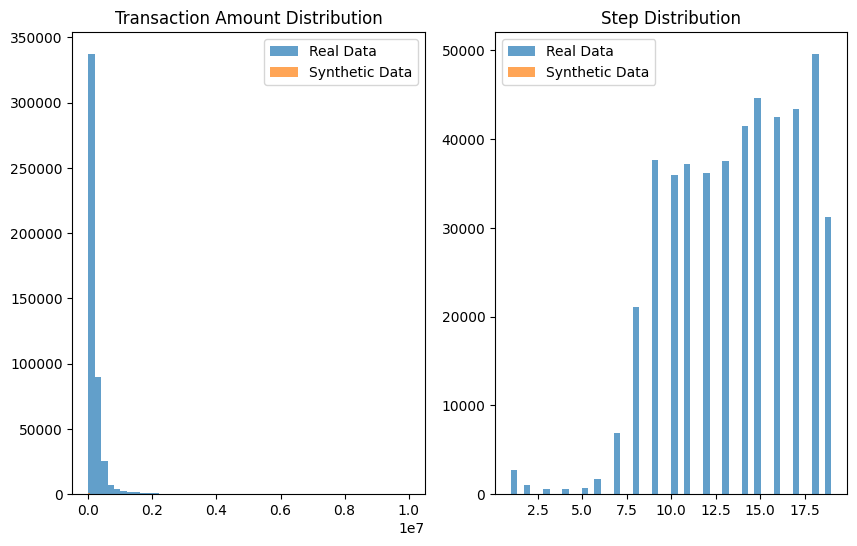

In [38]:

# Generate synthetic samples using the trained generator
def generate_synthetic_samples(generator, num_samples, latent_dim, device):
    generator.eval()
    z = torch.randn(num_samples, latent_dim).to(device)
    with torch.no_grad():
        synthetic_samples = generator(z)
    return synthetic_samples.cpu().numpy()

# Generate synthetic samples
num_samples = 1000
synthetic_samples = generate_synthetic_samples(generator, num_samples, input_dim, device)

# Convert to DataFrame for easy manipulation
columns = df.columns  # Use the same columns as the original dataset
synthetic_df = pd.DataFrame(synthetic_samples, columns=columns)

# Inverse transform to original scale if you used MinMaxScaler
synthetic_df = pd.DataFrame(scaler.inverse_transform(synthetic_df.values), columns=columns)

# Statistical comparison
print("Statistical Comparison between Real and Synthetic Data")
for column in columns:
    print(f"{column}: Real Mean = {df[column].mean()}, Synthetic Mean = {synthetic_df[column].mean()}")
    print(f"{column}: Real Std = {df[column].std()}, Synthetic Std = {synthetic_df[column].std()}")

# Visual inspection of a few generated samples
print("Sample generated transactions:")
print(synthetic_df.head())

# Optional: Save synthetic data to a CSV file
synthetic_df.to_csv('synthetic_transactions.csv', index=False)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['amount'], bins=50, alpha=0.7, label='Real Data')
plt.hist(synthetic_df['amount'], bins=50, alpha=0.7, label='Synthetic Data')
plt.title('Transaction Amount Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['step'], bins=50, alpha=0.7, label='Real Data')
plt.hist(synthetic_df['step'], bins=50, alpha=0.7, label='Synthetic Data')
plt.title('Step Distribution')
plt.legend()

plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the Generator network
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, output_dim),
            nn.Sigmoid()  # Output between 0 and 1
        )

    def forward(self, x):
        return self.model(x)

# Define the Discriminator network (WGAN-GP)
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        return self.model(x)

# Gradient Penalty for WGAN-GP
def compute_gradient_penalty(D, real_samples, fake_samples):
    alpha = torch.rand(real_samples.size(0), 1)
    alpha = alpha.expand_as(real_samples).to(real_samples.device)
    interpolates = alpha * real_samples + ((1 - alpha) * fake_samples)
    interpolates = interpolates.requires_grad_(True).to(real_samples.device)

    d_interpolates = D(interpolates)
    fake = torch.ones(real_samples.size(0), 1).to(real_samples.device)

    gradients = torch.autograd.grad(
        outputs=d_interpolates,
        inputs=interpolates,
        grad_outputs=fake,
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]

    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty

# Function to initialize the weights of the networks
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# Hyperparameters
batch_size = 128
lr = 0.00005
num_epochs = 200
input_dim = 100  # Dimension of the noise vector for the generator
output_dim = df.shape[1] - 2  # Dimension of the generated transaction (excluding 'isFraud' and 'isFlaggedFraud')
lambda_gp = 10  # Gradient penalty lambda
n_critic = 5  # Number of discriminator updates per generator update

# Load and preprocess the dataset
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop(['isFraud', 'isFlaggedFraud'], axis=1).values)
dataset = TensorDataset(torch.tensor(df_scaled, dtype=torch.float32))

# Handling class imbalance using WeightedRandomSampler
labels = df['isFraud'].values  # Assuming 'isFraud' is the label for class imbalance
unique_labels = np.unique(labels)
class_sample_count = np.array([len(np.where(labels == t)[0]) for t in unique_labels])
weight = 1. / class_sample_count

# Create a mapping from label values to their corresponding weights
label_to_weight = {label: weight[i] for i, label in enumerate(unique_labels)}

# Use the mapping to create the samples_weight array
samples_weight = np.array([label_to_weight[label] for label in labels])

samples_weight = torch.from_numpy(samples_weight)
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

dataloader = DataLoader(dataset, batch_size=batch_size, sampler=sampler)

# Create instances of the Generator and Discriminator
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(output_dim)

# Initialize weights
generator.apply(weights_init)
discriminator.apply(weights_init)

# Optimizers for WGAN-GP
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Training the WGAN-GP
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)

for epoch in range(num_epochs):
    for i, data in enumerate(dataloader):
        # Train Discriminator
        real_data = data[0].to(device)
        batch_size = real_data.size(0)

        noise = torch.randn(batch_size, input_dim).to(device)
        fake_data = generator(noise)

        real_validity = discriminator(real_data)
        fake_validity = discriminator(fake_data)

        # Compute gradient penalty
        gradient_penalty = compute_gradient_penalty(discriminator, real_data, fake_data)

        d_loss = -torch.mean(real_validity) + torch.mean(fake_validity) + lambda_gp * gradient_penalty

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator every n_critic steps
        if i % n_critic == 0:
            noise = torch.randn(batch_size, input_dim).to(device)
            fake_data = generator(noise)
            fake_validity = discriminator(fake_data)
            g_loss = -torch.mean(fake_validity)

            optimizer_G.zero_grad()
            g_loss.backward()
            optimizer_G.step()

        # Logging
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}')

# Save the trained models
torch.save(generator.state_dict(), 'generator_wgan.pth')
torch.save(discriminator.state_dict(), 'discriminator_wgan.pth')

# Generate synthetic samples using the trained generator
def generate_synthetic_samples(generator, num_samples, latent_dim, device):
    generator.eval()
    z = torch.randn(num_samples, latent_dim).to(device)
    with torch.no_grad():
        synthetic_samples = generator(z)
    return synthetic_samples.cpu().numpy()

# Generate synthetic samples
num_samples = 1000
synthetic_samples = generate_synthetic_samples(generator, num_samples, input_dim, device)

# Convert to DataFrame for easy manipulation
columns = df.columns  # Use the same columns as the original dataset
synthetic_df = pd.DataFrame(synthetic_samples, columns=columns)

# Inverse transform to original scale if you used MinMaxScaler
synthetic_df = pd.DataFrame(scaler.inverse_transform(synthetic_df.values), columns=columns)

# Statistical comparison
print("Statistical Comparison between Real and Synthetic Data")
for column in columns:
    print(f"{column}: Real Mean = {df[column].mean()}, Synthetic Mean = {synthetic_df[column].mean()}")
    print(f"{column}: Real Std = {df[column].std()}, Synthetic Std = {synthetic_df[column].std()}")

# Visual inspection of a few generated samples
print("Sample generated transactions:")
print(synthetic_df.head())

# Optional: Save synthetic data to a CSV file
synthetic_df.to_csv('synthetic_transactions.csv', index=False)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['amount'], bins=50, alpha=0.7, label='Real Data')
plt.hist(synthetic_df['amount'], bins=50, alpha=0.7, label='Synthetic Data')
plt.title('Transaction Amount Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['step'], bins=50, alpha=0.7, label='Real Data')
plt.hist(synthetic_df['step'], bins=50, alpha=0.7, label='Synthetic Data')
plt.title('Step Distribution')
plt.legend()

plt.show()


Epoch [1/200], Step [100/119], D Loss: -0.1061, G Loss: 0.0460
Epoch [2/200], Step [100/119], D Loss: -0.1410, G Loss: 0.2049
Epoch [3/200], Step [100/119], D Loss: -0.4676, G Loss: 0.7784
Epoch [4/200], Step [100/119], D Loss: -0.2939, G Loss: 0.8553
Epoch [5/200], Step [100/119], D Loss: -0.1274, G Loss: 0.2130
Epoch [6/200], Step [100/119], D Loss: -0.2831, G Loss: -0.0371
Epoch [7/200], Step [100/119], D Loss: -0.4700, G Loss: 0.5358
Epoch [8/200], Step [100/119], D Loss: -0.5452, G Loss: 0.6794
Epoch [9/200], Step [100/119], D Loss: -0.5846, G Loss: 0.8079
Epoch [10/200], Step [100/119], D Loss: -0.6245, G Loss: 0.8944
Epoch [11/200], Step [100/119], D Loss: -0.5915, G Loss: 0.9370
Epoch [12/200], Step [100/119], D Loss: -0.6086, G Loss: 0.9691
Epoch [13/200], Step [100/119], D Loss: -0.5647, G Loss: 0.9741
Epoch [14/200], Step [100/119], D Loss: -0.5572, G Loss: 1.0102
Epoch [15/200], Step [100/119], D Loss: -0.5632, G Loss: 1.0388
Epoch [16/200], Step [100/119], D Loss: -0.5801,